In [ ]:
# VD realizado con vinardo a 8x

In [1]:
import pandas as pd
import numpy as np
import glob

In [16]:
# Carga del DataFrame Principal
df_cdk2_labels = pd.read_json(r"./B_DATOS/TABLA_MTDATA_CDK2_402_crys_LIGS_INFO_LABELS_AUC_docking.json")
df_cdk2_labels.head(5)

,Title,Date,Entities,ChainID,Resolution,Identity,Coverage,NumGaps,GapLen,GapPos,NumLigs,NameLigs,Inhib,Inhib_mass,Labels_conf,AUC_vrd_16x,AUC_vrd_8x,AUC_vina,AUC_ad4_LC,AUC_ad4_LE
1aq1,human cyclin dependent kinase 2 complexed with...,1997-11-12,1,A,2.00,298,92.953020,2,"[8, 13]","[[36, 43], [149, 161]]",1,['STU'],STU,440.0,inact_b,0.730317,0.740724,0.575339,0.634163,0.572172
1b38,human cyclin-dependent kinase 2,1998-12-23,1,A,2.00,298,97.315436,1,[8],"[[36, 43]]",3,"['ACE', 'ATP', 'MG']",ATP,398.0,inact_a,0.677828,0.683258,0.546154,0.571946,0.483032
1b39,human cyclin-dependent kinase 2 phosphorylated...,1998-12-23,1,A,2.10,298,97.315436,1,[8],"[[36, 43]]",3,"['ACE', 'ATP', 'MG']",ATP,398.0,inact_a,0.764706,0.785520,0.580543,0.670814,0.607919
1buh,crystal structure of the human cdk2 kinase com...,1998-09-09,2,A,2.60,298,96.308725,2,"[7, 4]","[[40, 46], [295, 298]]",0,[],,,inact_a,0.708145,0.734163,0.535294,0.613348,0.544344
1ckp,human cyclin dependent kinase 2 complexed with...,1999-01-13,1,A,2.05,298,93.624161,2,"[8, 11]","[[36, 43], [153, 163]]",2,"['EDO', 'PVB']",PVB,214.0,inact_a,0.766968,0.781900,0.571493,0.764932,0.715385


In [3]:
# Carga de los resultados del docking
# Vinardo 8x DUD2066 402 cdk2
df_vrd_DUD2006 = pd.read_csv(F'./B_DATOS/vs_docking_DUD2006_vs_402_crys_vinardo_8x.csv', index_col=0)
df_vrd_DUD2006

,Actividad,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
Ligando,,,,,,,,,,,,,,,,,,,,,
ligand_1,Active,-9.1,-8.4,-8.5,-7.4,-8.6,-8.9,-8.4,-8.5,-8.5,...,-7.1,-7.4,-6.6,-7.5,-7.1,-6.8,-7.9,-7.1,-8.7,-6.6
ligand_2,Active,-8.2,-6.9,-6.8,-6.5,-6.7,-8.1,-8.0,-7.7,-8.0,...,-6.5,-6.6,-6.6,-6.7,-6.6,-6.3,-7.3,-6.3,-6.8,-6.6
ligand_3,Active,-9.0,-7.4,-8.3,-7.8,-7.1,-8.6,-8.0,-8.9,-7.5,...,-6.1,-6.6,-6.7,-7.6,-6.1,-6.1,-8.3,-6.7,-9.3,-6.5
ligand_4,Active,-9.6,-8.2,-7.6,-7.0,-7.3,-8.5,-8.0,-9.1,-9.0,...,-7.6,-7.9,-7.1,-7.6,-7.8,-6.7,-8.9,-6.1,-9.6,-6.6
ligand_5,Active,-9.0,-7.4,-8.3,-7.8,-7.1,-8.7,-7.9,-8.9,-8.8,...,-6.1,-6.6,-6.7,-7.6,-6.1,-6.1,-8.3,-6.7,-9.3,-6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
decoy_2070,Inactive,-9.2,-7.5,-7.4,-7.0,-7.0,-8.7,-7.6,-7.5,-8.3,...,-7.6,-7.9,-8.4,-7.0,-7.3,-7.6,-8.2,-7.7,-8.7,-7.8
decoy_2071,Inactive,-10.0,-7.8,-7.5,-7.5,-8.2,-8.3,-9.5,-8.6,-8.1,...,-7.5,-7.6,-7.4,-8.0,-7.5,-8.0,-8.0,-7.6,-8.3,-7.4
decoy_2072,Inactive,-8.4,-6.0,-6.4,-7.0,-7.2,-8.0,-7.1,-7.0,-7.2,...,-6.6,-7.3,-7.1,-7.4,-6.9,-6.6,-7.2,-7.0,-8.0,-7.3


In [9]:
# Identificamos a los ligandos que son activos
activos =  df_vrd_DUD2006.Actividad == "Active"

true_values = np.array(activos, dtype=int)
print(true_values[:80]) # Sólo los primeros 72 son activos

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0]


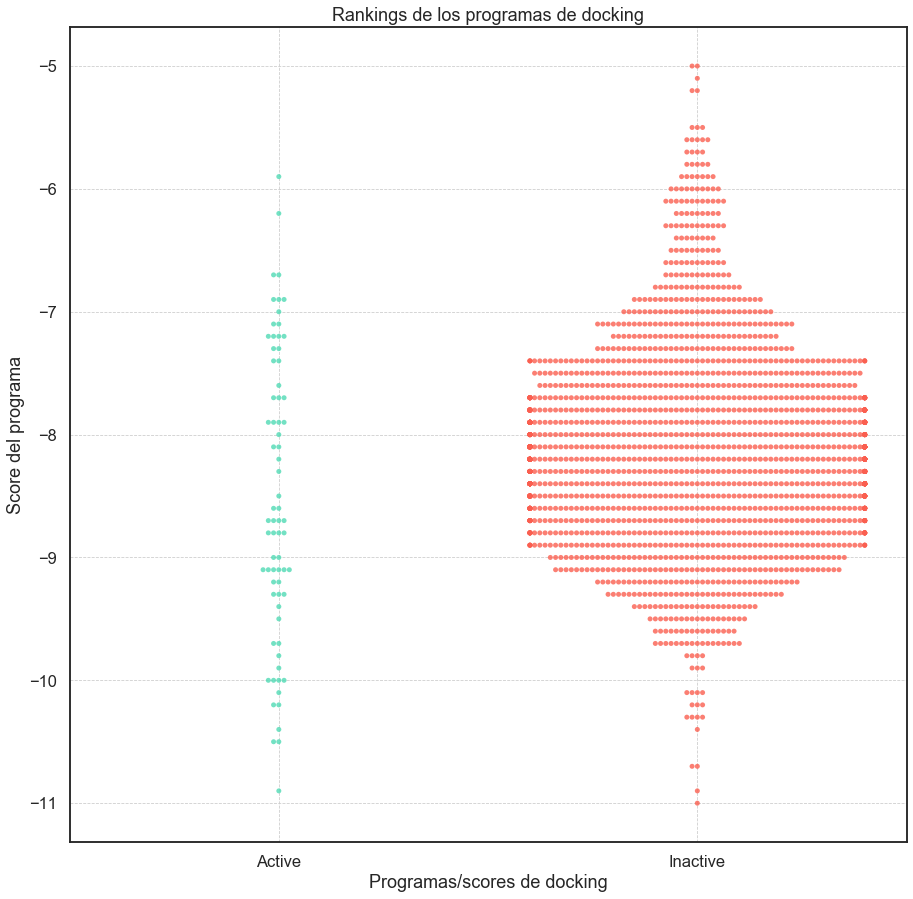

In [56]:
sns.set( context = 'talk', style = 'white')
cmp_ranking = sns.color_palette(["#50DAB4", "#FA5F50"])

fig, axes = plt.subplots()
fig.set_size_inches(15, 15)
sns.swarmplot(x= 'Actividad', y = '2vv9', data= df_vrd_DUD2006[["Actividad",'2vv9']], 
              ax = axes, alpha=0.8,
              s = 5, palette = cmp_ranking)
axes.set_title('Rankings de los programas de docking')
axes.grid(linestyle='--', linewidth='0.8')
plt.xlabel("Programas/scores de docking")
plt.ylabel("Score del programa")
plt.show()

In [6]:
# Librerías para calcular las ROC y el AUC
from sklearn.metrics import roc_curve, roc_auc_score

In [21]:
# Establecemos los parámetros para graficar
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
pylab.rcParams['figure.figsize'] = (7, 7)
sns.set( context = 'talk', style = 'white', palette = "Set2")

def add_plot_roc(predicted_values, true_values, label):
    inverted_input = np.negative(predicted_values)
    fpr, tpr, thresholds = roc_curve(true_values, inverted_input)
    auc = roc_auc_score( y_true = true_values, y_score = inverted_input)
    plt.plot(fpr, tpr, label= label + ' AUC = %0.2f' % auc, lw = 4)

def plot_roc(predicted_values, true_values, label, titulo = "ROC curve"):
    sns.color_palette("Paired")
    add_plot_roc(predicted_values, true_values, label)
    plt.legend()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("FPR (1 - specificity)")
    plt.ylabel("TPR (sensitivity)")
    plt.grid(linestyle='--', linewidth='0.8')
    plt.title(titulo)
    plt.show()

In [11]:
sc_promedio_DUD = np.array( df_vrd_DUD2006.mean(axis=1))

print('AUC del valor PROMEDIO DUD (402 estructuras):')
print("Vinardo 8x:", 
        roc_auc_score( y_true = true_values, y_score = (- sc_promedio_DUD)) )    

AUC del valor PROMEDIO DUD (402 estructuras):
Vinardo 8x: 0.6000080360012857


In [ ]:
# Auc para todas las conformaciones

In [17]:
df_cdk2_labels["AUC_vrd_DUD"] = 0.0
for pdb in df_cdk2_labels.index:
    # Vinardo 8x
    roc_vrd_8x = roc_auc_score(np.array(true_values), - df_vrd_DUD2006[ pdb ])
    df_cdk2_labels.at[ pdb, "AUC_vrd_DUD"] = roc_vrd_8x

In [19]:
df_cdk2_labels.iloc[:, -8:].head(3)

,Inhib_mass,Labels_conf,AUC_vrd_16x,AUC_vrd_8x,AUC_vina,AUC_ad4_LC,AUC_ad4_LE,AUC_vrd_DUD
1aq1,440.0,inact_b,0.730317,0.740724,0.575339,0.634163,0.572172,0.623570
1b38,398.0,inact_a,0.677828,0.683258,0.546154,0.571946,0.483032,0.566381
1b39,398.0,inact_a,0.764706,0.785520,0.580543,0.670814,0.607919,0.603356


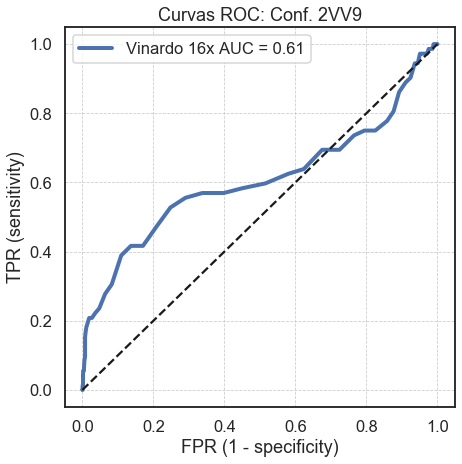

In [57]:
# ROC de la mejor conformación de vinardo 8x
#pdb_id = df_cdk2_labels[["AUC_vrd_DUD"]].idxmax()[0]
pdb_id = '2vv9'

plot_roc(df_vrd_DUD2006[ pdb_id ], true_values, "Vinardo 16x", F"Curvas ROC: Conf. {pdb_id.upper()}")

In [32]:
# Seleccionamos las columnas que poseen los scores para cada método usado
df_auc_scores = df_cdk2_labels[['AUC_ad4_LE', 'AUC_ad4_LC', 
                'AUC_vina', 'AUC_vrd_8x', 'AUC_vrd_16x', 'AUC_vrd_DUD']]


In [63]:
len("programador")

11

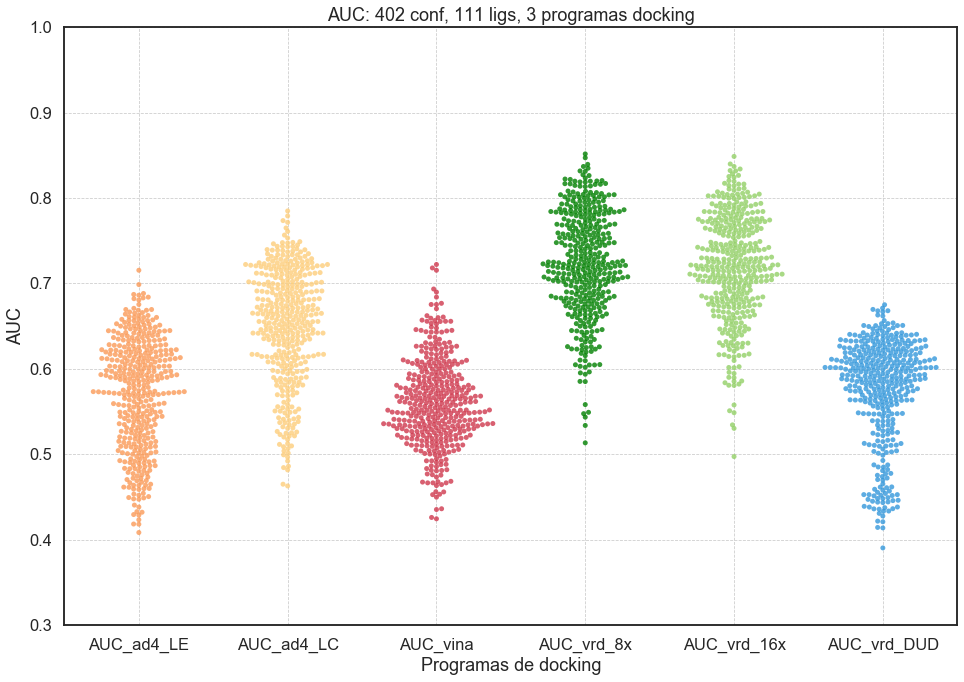

In [34]:
fig, axes = plt.subplots()

fig.set_size_inches(16, 11)
sns.swarmplot( data= df_auc_scores, ax = axes, alpha=0.8, 
               palette= cmp, s = 5)
axes.set_title('AUC: 402 conf, 111 ligs, 3 programas docking')
axes.grid(linestyle='--', linewidth='0.8')
plt.xlabel("Programas de docking")
plt.ylabel("AUC")
plt.ylim(0.3, 1)
plt.show()

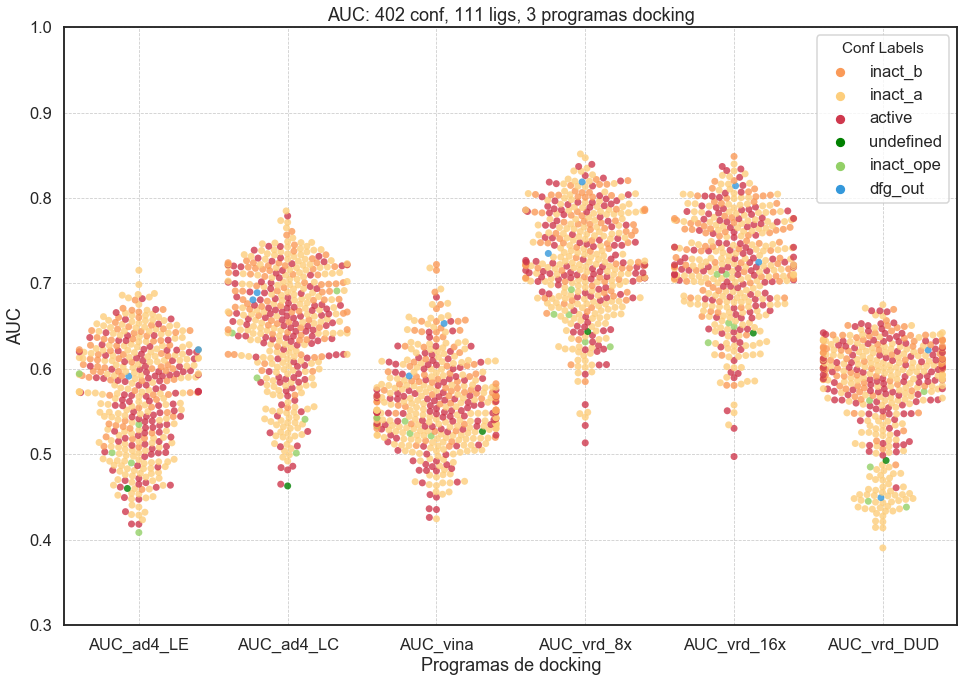

In [59]:
fig, axes = plt.subplots()

cmp = sns.set_palette(['#fa9a58', '#fdce7c', '#cf384d', 'green', '#93d067',  '#3498db'])
data = df_auc_scores
data = data.melt()
data['Conf Labels'] = np.tile(df_cdk2_labels.Labels_conf, 6)

fig.set_size_inches(16, 11)
sns.swarmplot(x = "variable", y = "value", data= data, ax = axes, alpha=0.8, 
              hue = "Conf Labels", palette= cmp, s = 7)
axes.set_title('AUC: 402 conf, 111 ligs, 3 programas docking')
axes.grid(linestyle='--', linewidth='0.8')
plt.xlabel("Programas de docking")
plt.ylabel("AUC")
plt.ylim(0.3, 1)
plt.show()